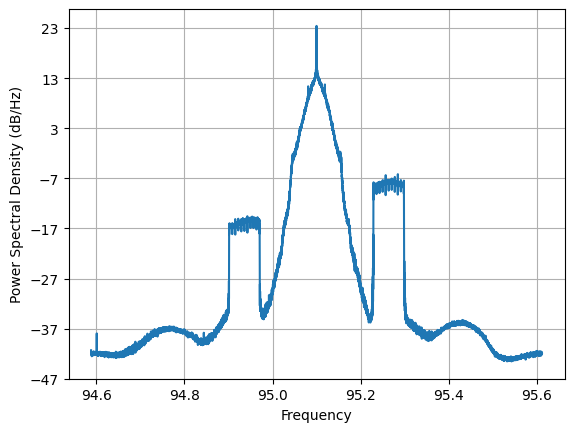

In [4]:
# paramètres globaux
RATE = 1024000
FREQ = 95100000
duréeEnregistrement=10
# importer la librairie du module SDR
from rtlsdr import RtlSdr
import wavio
import numpy as np
from scipy.signal import butter, filtfilt

temps=np.linspace(0,10,10*RATE)

# créer un objet connecté au module SDR
sdr = RtlSdr()
sdr.sample_rate = RATE
sdr.center_freq = FREQ
sdr.gain = 'auto'
# enregistrer des échantillons I/Q en nombres complexes
samples = sdr.read_samples(RATE*duréeEnregistrement)
sdr.close()
# graphique de la densité spectrale de puissance
import matplotlib.pyplot as plt
# psd = Power Spectral Density
plt.psd(samples, NFFT=2 ** 14, Fs=RATE / 1e6, Fc=FREQ / 1e6)
plt.show()




Enregistrement

In [96]:
import scipy as sp
from scipy.signal import butter, sosfilt, sosfreqz, lfilter

reel = np.real(samples)
imaginaire = np.imag(samples)

phase=np.arctan(imaginaire/reel)
signalAudio=np.gradient(phase,temps)


wavio.write('test.wav',signalAudio,RATE,sampwidth=2)


Filtre

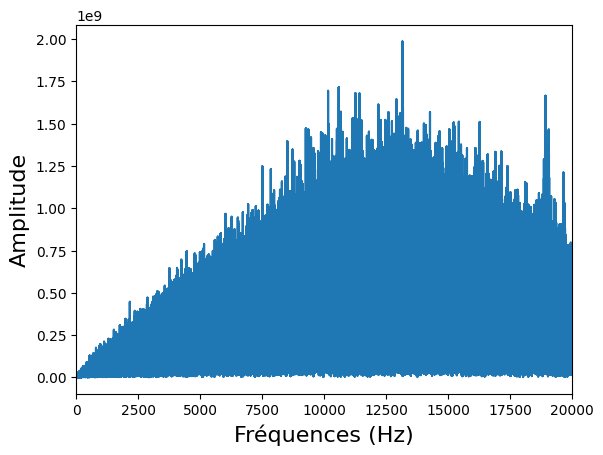

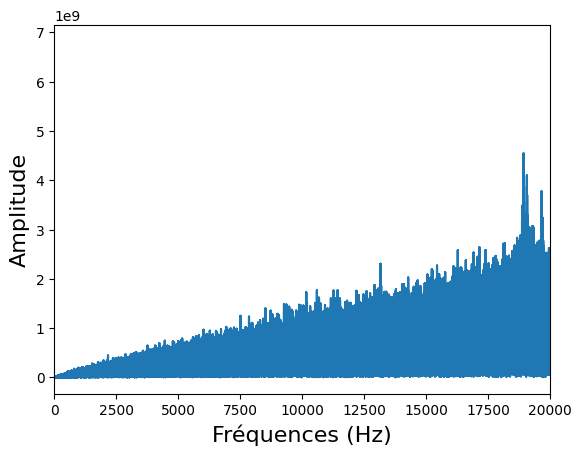

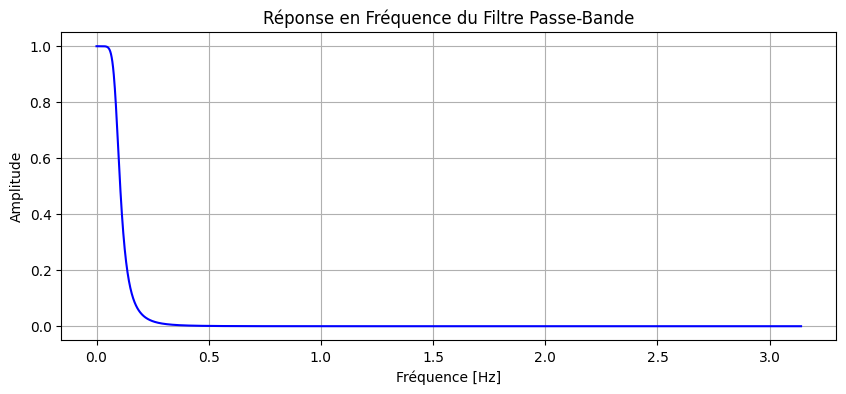

In [102]:
# Définir les paramètres du filtre
order = 4  # Ordre du filtre
RATE = 1024000
fs = RATE/1e6
low = 1500/1e6
high = 15000/1e6

# Calculer les coefficients du filtre
sos = butter(order,high, fs=fs, btype='low', output='sos')

# Appliquer le filtre au signal
filtered_data = sosfilt(sos, signalAudio)

freq = np.fft.fftshift(np.fft.fftfreq(len(signalAudio),temps[1]))
FFT_signalaudio = np.fft.fftshift(np.fft.fft(signalAudio))
FFT_signalaudiofiltre = np.fft.fftshift(np.fft.fft(filtered_data))

fig,ax=plt.subplots()
ax.plot(np.abs(freq),np.abs(FFT_signalaudiofiltre))
ax.set_xlim(0,20000)
ax.set_xlabel('Fréquences (Hz)', fontsize=16)
ax.set_ylabel('Amplitude', fontsize=16)
plt.show

fig,ax=plt.subplots()
ax.plot(np.abs(freq),np.abs(FFT_signalaudio))
ax.set_xlim(0,20000)
ax.set_xlabel('Fréquences (Hz)', fontsize=16)
ax.set_ylabel('Amplitude', fontsize=16)
plt.show

# Visualiser la réponse en fréquence du filtre
w, h = sosfreqz(sos, worN=2000)

plt.figure(figsize=(10, 4))
plt.plot(w, np.abs(h), 'b')
plt.title('Réponse en Fréquence du Filtre Passe-Bande')
plt.xlabel('Fréquence [Hz]')
plt.ylabel('Amplitude')
plt.grid()
plt.show()

wavio.write("C:\\Users\\Justine Lejeune\\OneDrive\\Documents\\université\\automne 2024\\TechX\\Radio-FM\\test.wav", filtered_data,RATE,sampwidth=2)
